## pba-modul3-en-text-summarization


Nama : Emmanuel Mathew Krisna Rata
NPM : 200710530


1.1.1 Inisialisasi

In [1]:
import numpy as np
import pandas as pd
from gensim import corpora, models
from html import parser

In [2]:
CORPUS = pd.read_csv('amazon_skyrim_reviews.csv')
CORPUS = np.array(CORPUS['Reviews'])

In [3]:
# mengecek apakah file sudah terpanggil
CORPUS[12]

'I base the value of a game on the amount of enjoyable gameplay I can get out of it and this one was definitely worth the price!'

Topic Modelling

In [4]:
from normalization import normalize_corpus


In [5]:
total_topics = 10

In [6]:
def train_lsi_model_gensim(corpus, total_topics=2):
    norm_tokenized_corpus = normalize_corpus(corpus, tokenize=True)
    dictionary = corpora.Dictionary(norm_tokenized_corpus)
    mapped_corpus = [dictionary.doc2bow(text)
                        for text in norm_tokenized_corpus]
    tfidf = models.TfidfModel(mapped_corpus)
    corpus_tfidf = tfidf[mapped_corpus]
    lsi = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=total_topics)
    return lsi

In [7]:
def print_topics_gensim(topic_model, total_topics=1, weight_threshold=0.0001, display_weights=False, num_terms=None):
    for index in range(total_topics):
        topic = topic_model.show_topic(index)  # Get the terms and their weights for the current topic
        topic = [(word, round(wt, 2)) for word, wt in topic if abs(wt) >= weight_threshold]  # Filter out terms with low weights
        
        if display_weights:
            print('Topic ' + str(index + 1) + ' with weights')
            print(topic[:num_terms] if num_terms else topic)  # Display terms and their weights (up to num_terms)
        else:
            print('Topic #' + str(index + 1) + ' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms] if num_terms else tw) 

In [8]:
lsi_gensim = train_lsi_model_gensim(CORPUS, total_topics=total_topics)
print_topics_gensim(topic_model=lsi_gensim,
                    total_topics=total_topics,
                    num_terms=10,
                    display_weights=False)

Topic #1 without weights
[',', '!', '``', 'skyrim', 'like', 'one', 'play', ')', '(', 'quest']
Topic #2 without weights
['!', 'love', '``', 'fun', 'great', 'ever', 'recommend', 'best', 'buy', 'dont']
Topic #3 without weights
['!', 'recommend', '*', '``', 'highly', 'series', 'fun', 'hour', 'scroll', 'great']
Topic #4 without weights
['*', 'recommend', 'highly', 'love', 'good', 'fun', 'series', 'wonderful', 'scroll', 'elder']
Topic #5 without weights
['*', 'recommend', 'highly', '``', 'ever', 'wonderful', 'love', 'best', 'buy', '!']
Topic #6 without weights
['``', 'fun', '--', 'mission', 'ever', 'elder', 'scroll', 'best', ';', 'glitch']
Topic #7 without weights
['``', 'fun', '*', 'scroll', 'elder', 'highly', 'recommend', 'hour', 'series', 'gameplay']
Topic #8 without weights
['scroll', 'elder', 'series', 'ever', 'fun', 'always', '...', 'else', 'best', 'love']
Topic #9 without weights
['...', '&', 'else', '*', 'fan', 'finish', 'nothing', 'series', 'hundred', 'ever']
Topic #10 without weigh

Latent Dirichlet Allocation

In [9]:
def train_lda_model_gensim(corpus, total_topics=2):
    # Step 1: Normalize and tokenize the input corpus
    norm_tokenized_corpus = normalize_corpus(corpus, tokenize=True)  # You should have a function to normalize and tokenize your input text

    # Step 2: Create a Gensim Dictionary and map the corpus to a bag of words representation
    dictionary = corpora.Dictionary(norm_tokenized_corpus)
    mapped_corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]

    # Step 3: Create a TF-IDF model and apply it to the mapped corpus
    tfidf = models.TfidfModel(mapped_corpus)
    corpus_tfidf = tfidf[mapped_corpus]

    # Step 4: Train the LDA model
    lda = models.LdaModel(
        corpus_tfidf,  # The TF-IDF transformed corpus
        id2word=dictionary,  # Dictionary to map between words and their integer IDs
        iterations=1000,  # Number of iterations for training
        num_topics=total_topics  # Number of topics to extract
    )

    return lda

In [10]:
lda_gensim = train_lda_model_gensim(CORPUS, total_topics=total_topics)
print_topics_gensim(topic_model=lda_gensim,
                    total_topics=total_topics,
                    num_terms=10,
                    display_weights=False)

Topic #1 without weights
[',', '``', 'skyrim', 'scroll', 'elder', 'much', 'see', 'even', 'fable', 'te']
Topic #2 without weights
[',', '!', 'content', '``', 'still', 'fun', 'extra', 'story', 'great', 'think']
Topic #3 without weights
['!', 'fun', ',', '``', 'rpg', 'ever', 'best', 'great', 'play', 'graphic']
Topic #4 without weights
[',', '!', '``', 'one', 'go', 'play', 'skyrim', 'quest', 'world', 'interfere']
Topic #5 without weights
['!', ',', 'get', 'love', '...', 'quest', 'play', '-', 'best', 'hour']
Topic #6 without weights
[',', 'one', 'skyrim', '``', '!', 'hundred', '--', 'good', 'ever', 'like']
Topic #7 without weights
['good', ',', 'finish', 'skyrim', 'big', 'play', ')', 'great', 'time', '(']
Topic #8 without weights
['*', 'love', ',', '...', 'great', '!', 'enjoy', 'amazing', ':', 'different']
Topic #9 without weights
['!', ',', 'amazing', '&', 'buy', 'blah', 'gamer', 'get', 'all-time', 'franchise']
Topic #10 without weights
['!', ',', 'recommend', 'like', 'love', 'play', 'woul

Latent Dirichlet Allocation with Scikit Learn

In [11]:
 # Memanggil library scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from utils import build_feature_matrix

In [12]:
def print_topics_udf(topics, total_topics=1, weight_threshold=0.0001, display_weights=False, num_terms=None):
    for index in range(total_topics):
        topic = topics[index]  # Get the terms and their weights for the current topic
        topic = [(term, float(wt)) for term, wt in topic]  # Convert the weights to float
        topic = [(word, round(wt, 2)) for word, wt in topic if abs(wt) >= weight_threshold]  # Filter out terms with low weights
        
        if display_weights:
            print('Topic #' + str(index + 1) + ' with weights')
            print(topic[:num_terms] if num_terms else topic)  # Display terms and their weights (up to num_terms)
        else:
            print('Topic #' + str(index + 1) + ' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms] if num_terms else tw)  # Display terms only (up to num_terms)


In [13]:
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    

    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    

    sorted_weights = np.array([list(wt[index]) for wt, index in zip(weights, sorted_indices)])
    

    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])
    

    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms, sorted_weights)]
    
    return topics

In [14]:
def train_lda_model_sklearn(corpus, total_topics=2):

    norm_corpus = normalize_corpus(corpus) 


    vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf')
    # feature_names = vectorizer.get_feature_names()
    feature_names = vectorizer.get_feature_names_out()



    lda = LatentDirichletAllocation(
        n_components=total_topics, 
        max_iter=100,  
        learning_method='online',
        learning_offset=50.,
        random_state=42
    )
    lda.fit(tfidf_matrix)

    weights = lda.components_
    topics = get_topics_terms_weights(weights, feature_names)

    return topics

In [15]:
lda_sklearn = train_lda_model_sklearn(CORPUS, total_topics=total_topics)
print_topics_udf(topics=lda_sklearn,
                    total_topics=total_topics,
                    num_terms=10,
                    display_weights=False)

Topic #1 without weights
['able', 'game', 'elder', 'expert', 'pass', 'gamer', 'problem', 'shamble', 'best', 'franchise']
Topic #2 without weights
['game', 'play', 'get', 'skyrim', 'one', 'great', 'like', 'time', 'quest', 'much']
Topic #3 without weights
['disc', 'bottomed', 'down', 'thirty', 'outer', 'unrivaled', 'relative', 'nutter', 'cover', 'troll']
Topic #4 without weights
['play', 'sadly', 'creationyou', 'together', 'dlc', 'balance', 'skyrim', 'uncomfortable', 'cowboy', 'heavily']
Topic #5 without weights
['game', 'skyrim', 'understand', 'haha', 'complaint', 'quest', 'stunted', 'holiday', 'await', 'angry']
Topic #6 without weights
['de', 'futuras', 'compras', 'responsabilidad', 'para', 'crédito', 'tarjeta', 'skyrimseguridad', 'pagar', 'recomiendo']
Topic #7 without weights
['game', 'play', 'lag', 'definitely', 'horrible', 'teeth', 'wooly', 'simply', 'bite', 'executioner']
Topic #8 without weights
['game', 'fight', 'concordat', 'subjective', 'type', 'skyrim', 'machination', 'unmark

Non-Negative Matrix Factorization - NMF with Scikit Learn

In [16]:
from sklearn.decomposition import NMF

In [17]:
nmf = NMF(n_components=total_topics, random_state=42, beta_loss="frobenius", alpha_W=0.0, alpha_H='same', l1_ratio=.5)
norm_corpus = normalize_corpus(CORPUS)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf')
nmf.fit(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()
weights = nmf.components_
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics, total_topics=total_topics, num_terms=10, display_weights=False)

Topic #1 without weights
['level', 'character', 'skill', 'make', 'dragon', 'also', 'use', 'game', 'system', 'many']
Topic #2 without weights
['best', 'ever', 'play', 'game', 'rpg', 'one', 'ive', 'far', 'everything', 'decade']
Topic #3 without weights
['scroll', 'elder', 'series', 'always', 'pass', 'much', 'enjoy', 'everyone', 'far', 'game']
Topic #4 without weights
['love', 'game', 'oblivion', 'dont', 'come', 'fallout', 'like', 'son', 'one', 'intuitive']
Topic #5 without weights
['fun', 'game', 'much', 'mission', 'graphic', 'say', 'see', 'glitch', 'improvement', 'many']
Topic #6 without weights
['good', 'like', 'really', 'oblivion', 'game', 'think', 'bethesda', 'much', 'feel', 'fallout']
Topic #7 without weights
['recommend', 'highly', 'play', 'game', 'wonderful', 'hour', 'surprise', 'graphic', 'option', 'cool']
Topic #8 without weights
['quest', 'get', 'time', 'go', 'game', 'start', 'save', 'thing', 'main', 'glitch']
Topic #9 without weights
['game', 'great', 'buy', 'long', 'excellent

/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        
        for side in "top right left".split():
            ax.spines[side].set_visible(False)
    
    fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

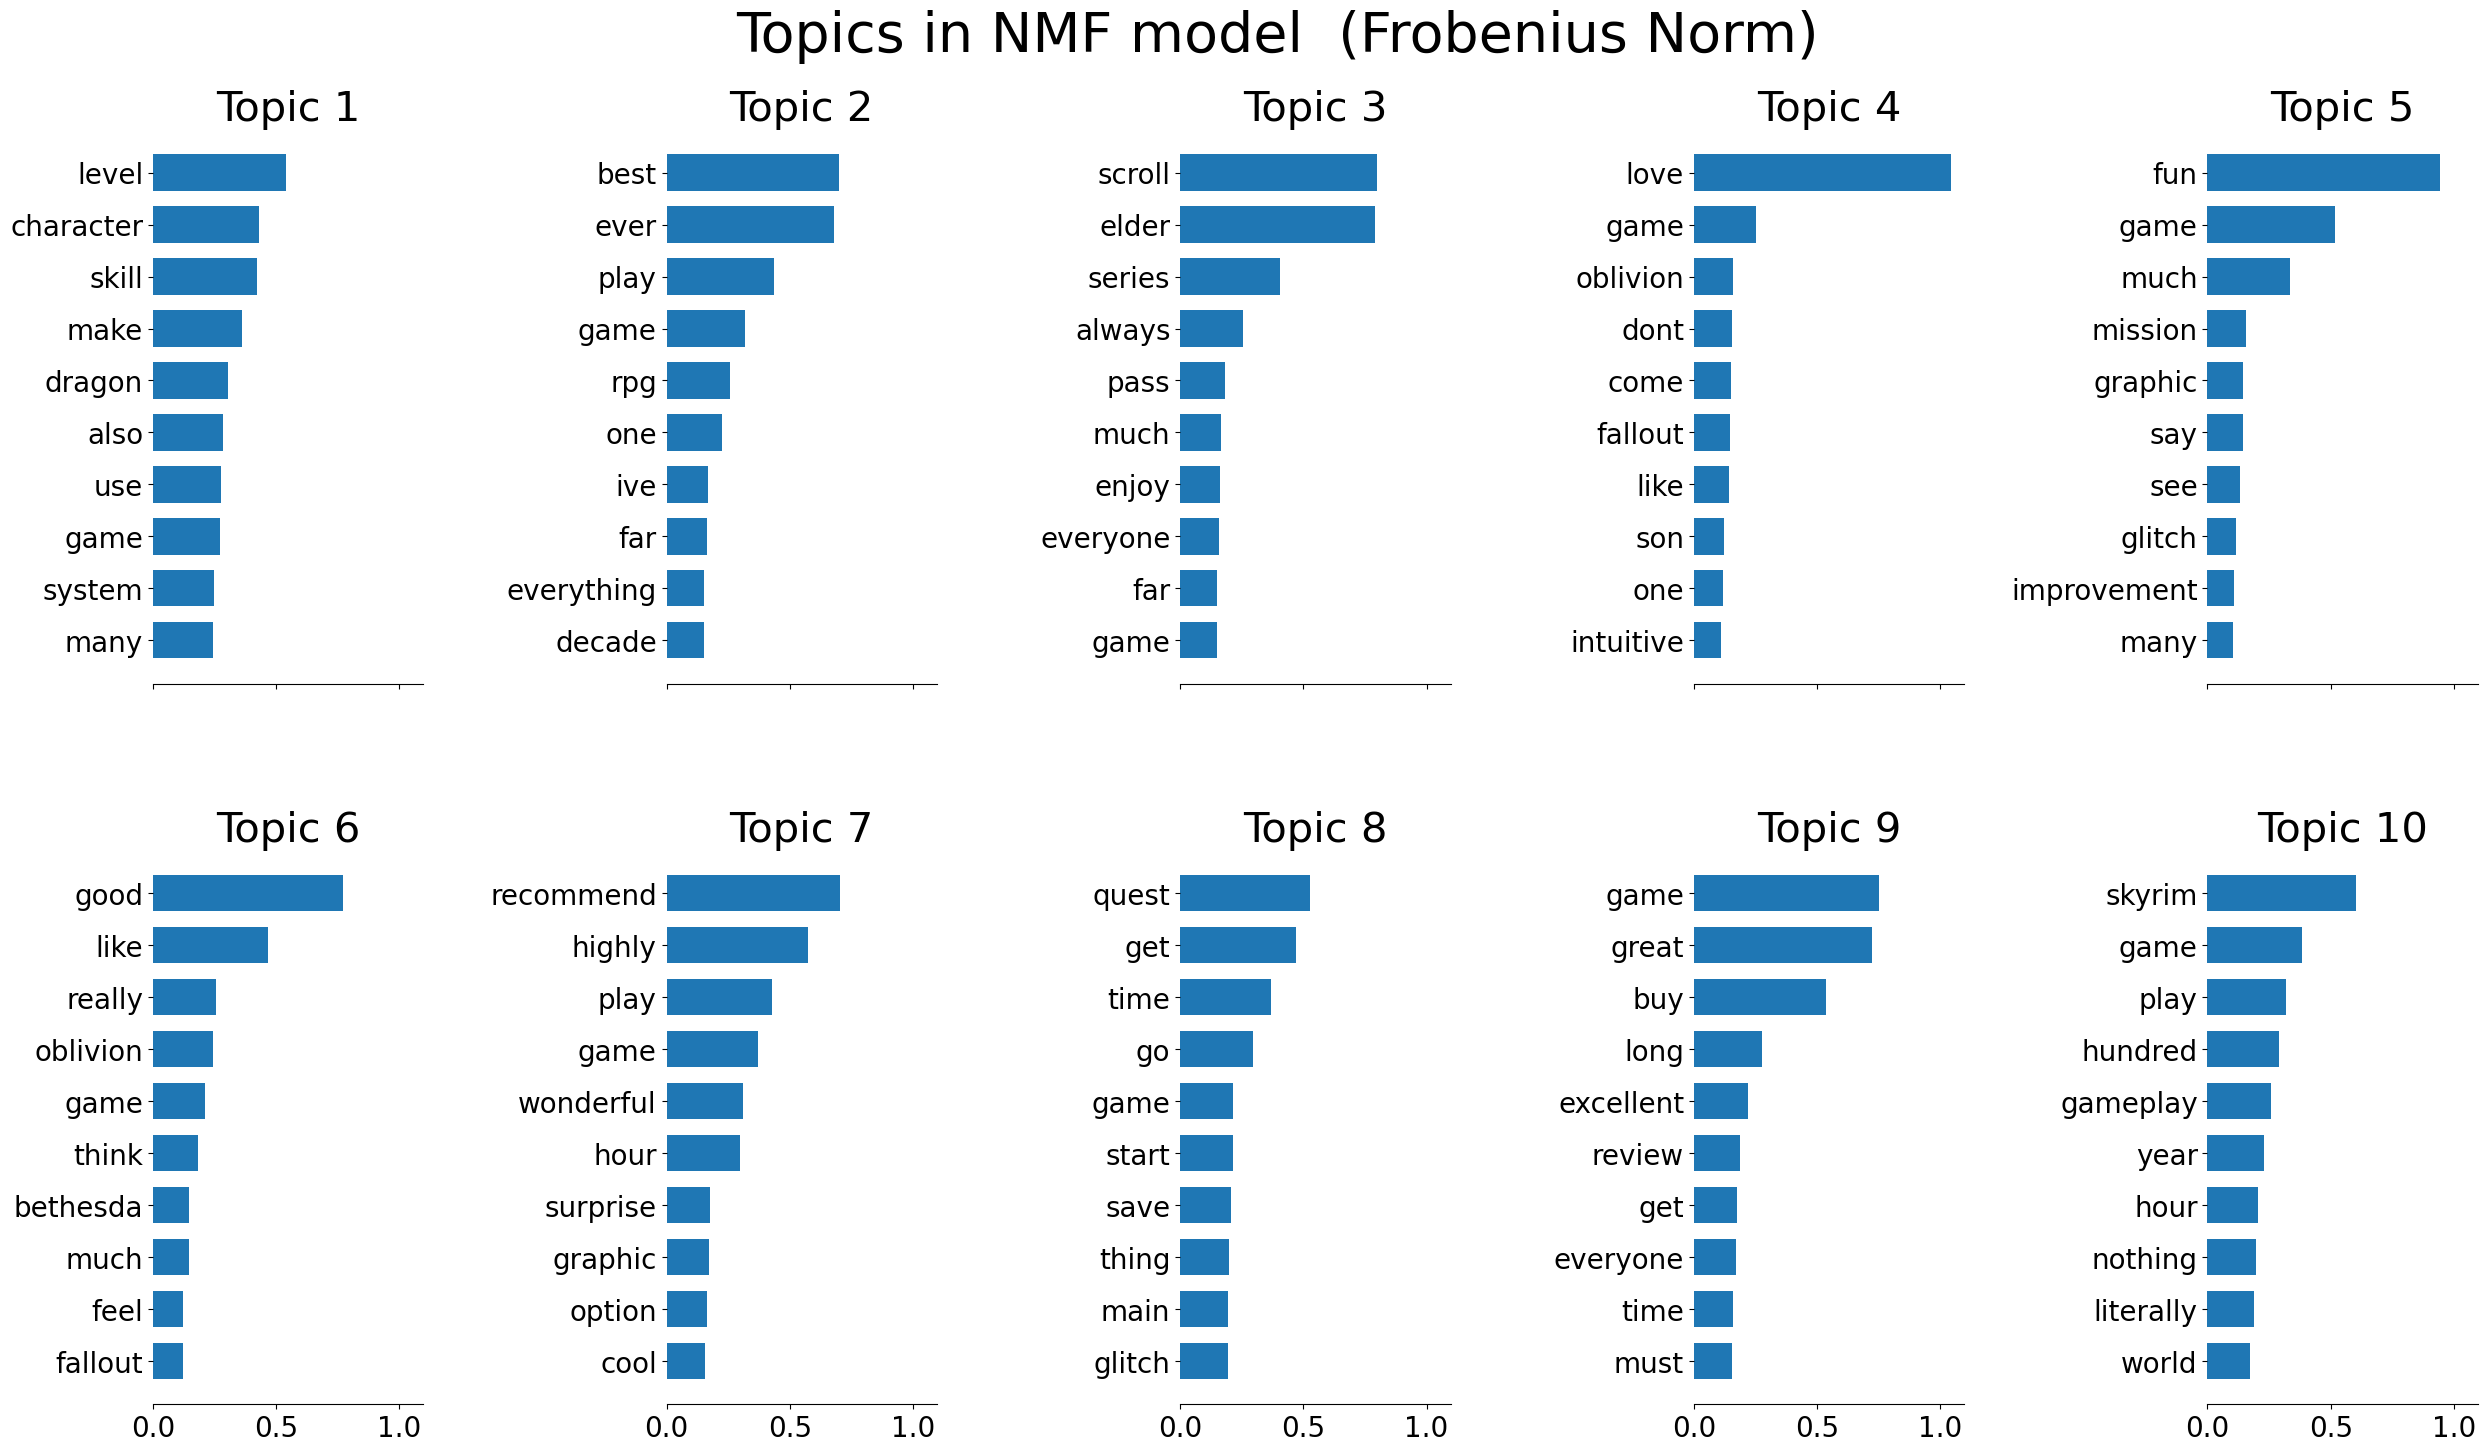

In [20]:
n_top_words = 10
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,"Topics in NMF model  (Frobenius Norm)")

1.1.3 Automated Document Summarization

Extraction-based Summarization using TF-IDF

In [21]:
docs = """
The modern definition of artificial intelligence (or AI) is "the study and design of intelligent agents" where an intelligent agent is a system that perceives its environment and takes actions which maximize its chances of success.
John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines."
Other names for the field have been proposed, such as computational intelligence, synthetic intelligence or computational rationality.
The term artificial intelligence is also used to describe a property of machines or programs: the intelligence that the system demonstrates.
AI research uses tools and insights from many fields, including computer science, psychology, philosophy, neuroscience, cognitive science, linguistics, operations research, economics, control theory, probability, optimization, and logic.
AI research also overlaps with tasks such as robotics, control systems, scheduling, data mining, logistics, speech recognition, facial recognition and many others.
Computational intelligence involves iterative development or learning (e.g., parameter tuning in connectionist systems). Learning is based on empirical data and is associated with non-symbolic AI, scruffy AI, and soft computing.
Subjects in computational intelligence as defined by IEEE Computational Intelligence Society mainly include:
Neural networks: trainable systems with very strong pattern recognition capabilities.
Fuzzy systems: techniques for reasoning under uncertainty, have been widely used in modern industrial and consumer product control systems; capable of working with concepts such as 'hot', 'cold', 'warm', and 'boiling'.
Evolutionary computation: applies biologically inspired concepts such as populations, mutation, and survival of the fittest to generate increasingly better solutions to the problem.
These methods most notably divide into evolutionary algorithms (e.g., genetic algorithms) and swarm intelligence (e.g., ant algorithms).
With hybrid intelligent systems, attempts are made to combine these two groups.
Expert inference rules can be generated through neural network or production rules from statistical learning such as in ACT-R or CLARION.
It is thought that the human brain uses multiple techniques to both formulate and cross-check results.
Thus, systems integration is seen as promising and perhaps necessary for true AI, especially the integration of symbolic and connectionist models.
"""


In [22]:
def get_average(values):
    greater_than_zero_count = total = 0
    for value in values:
        if value != 0:
            greater_than_zero_count += 1
            total += value
    if greater_than_zero_count == 0:
        return 0  # Avoid division by zero if there are no non-zero values.
    return total / greater_than_zero_count


In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
def get_lemmatized_tokens(text):
    # Tokenize the text, remove punctuation, and convert to lowercase
    normalized_tokens = nltk.word_tokenize(
        text.translate(str.maketrans('', '', string.punctuation)).lower()
    )

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(normalized_token) for normalized_token in normalized_tokens]

    return lemmatized_tokens

In [25]:
def get_threshold(tfidf_results):
    i = total = 0
    while i < tfidf_results.shape[0]:
        total += get_average(tfidf_results[i, :].toarray()[0])
        i += 1
    if tfidf_results.shape[0] == 0:
        return 0  # Avoid division by zero if there are no rows.
    return total / tfidf_results.shape[0]


In [26]:
def get_summary(documents, tfidf_results, threshold):
    summary = ""
    i = 0
    avg_threshold = get_threshold(tfidf_results) * threshold

    while i < tfidf_results.shape[0]:
        avg_tfidf = get_average(tfidf_results[i, :].toarray()[0])
        if avg_tfidf >= avg_threshold:
            summary += ' ' + documents[i]
        i += 1

    return summary


In [27]:
def remove_punctuation_marks(text):
    punctuation_marks = dict((ord(punctuation_mark), None) for punctuation_mark in string.punctuation)
    return text.translate(punctuation_marks)

In [28]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

In [29]:
 documents = nltk.sent_tokenize(docs)
 

In [30]:
print(documents)

['\nThe modern definition of artificial intelligence (or AI) is "the study and design of intelligent agents" where an intelligent agent is a system that perceives its environment and takes actions which maximize its chances of success.', 'John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines."', 'Other names for the field have been proposed, such as computational intelligence, synthetic intelligence or computational rationality.', 'The term artificial intelligence is also used to describe a property of machines or programs: the intelligence that the system demonstrates.', 'AI research uses tools and insights from many fields, including computer science, psychology, philosophy, neuroscience, cognitive science, linguistics, operations research, economics, control theory, probability, optimization, and logic.', 'AI research also overlaps with tasks such as robotics, control systems, scheduling, data mining, logistics, speech 

In [31]:
tfidf_results = TfidfVectorizer(
    tokenizer=get_lemmatized_tokens,
    stop_words=stopwords.words('english')
).fit_transform(documents)

/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/krisna/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wa', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


In [32]:
threshold = 0.85  # Corrected variable name
get_summary(documents, tfidf_results, threshold)



' John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines." Other names for the field have been proposed, such as computational intelligence, synthetic intelligence or computational rationality. The term artificial intelligence is also used to describe a property of machines or programs: the intelligence that the system demonstrates. Computational intelligence involves iterative development or learning (e.g., parameter tuning in connectionist systems). Learning is based on empirical data and is associated with non-symbolic AI, scruffy AI, and soft computing. Subjects in computational intelligence as defined by IEEE Computational Intelligence Society mainly include:\nNeural networks: trainable systems with very strong pattern recognition capabilities. Evolutionary computation: applies biologically inspired concepts such as populations, mutation, and survival of the fittest to generate increasingly better solutions to the prob

In [33]:
threshold = 0.9  # Corrected variable name
get_summary(documents, tfidf_results, threshold)


' John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines." Other names for the field have been proposed, such as computational intelligence, synthetic intelligence or computational rationality. The term artificial intelligence is also used to describe a property of machines or programs: the intelligence that the system demonstrates. Computational intelligence involves iterative development or learning (e.g., parameter tuning in connectionist systems). Learning is based on empirical data and is associated with non-symbolic AI, scruffy AI, and soft computing. Evolutionary computation: applies biologically inspired concepts such as populations, mutation, and survival of the fittest to generate increasingly better solutions to the problem. These methods most notably divide into evolutionary algorithms (e.g., genetic algorithms) and swarm intelligence (e.g., ant algorithms). With hybrid intelligent systems, attempts are made to 

In [34]:
threshold = 0.95  # Corrected variable name
get_summary(documents, tfidf_results, threshold)


' John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines." Other names for the field have been proposed, such as computational intelligence, synthetic intelligence or computational rationality. The term artificial intelligence is also used to describe a property of machines or programs: the intelligence that the system demonstrates. Computational intelligence involves iterative development or learning (e.g., parameter tuning in connectionist systems). Learning is based on empirical data and is associated with non-symbolic AI, scruffy AI, and soft computing. These methods most notably divide into evolutionary algorithms (e.g., genetic algorithms) and swarm intelligence (e.g., ant algorithms). With hybrid intelligent systems, attempts are made to combine these two groups. Expert inference rules can be generated through neural network or production rules from statistical learning such as in ACT-R or CLARION. It is thought that

1.1.4 Extractive Summarization with TF-IDF - Sentence Score

In [35]:
import re
import math
import operator
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('averaged_perceptron_tagger')
Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/krisna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [36]:
def lemmatize_words(words):
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(wordlemmatizer.lemmatize(word))
    return lemmatized_words

def stem_words(words):
    stemmed_words = []
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words

def remove_special_characters(text):
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex, '', text)
    return text

def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        dict_freq[word] = words.count(word)
    return dict_freq

def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word, tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
            pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb

In [37]:
def tf_score(word, sentence):
    freq_sum = 0
    word_frequency_in_sentence = 0
    len_sentence = len(sentence)
    
    for word_in_sentence in sentence.split():
        if word == word_in_sentence:
            word_frequency_in_sentence = word_frequency_in_sentence + 1

    tf = word_frequency_in_sentence / len_sentence
    return tf

def idf_score(no_of_sentences, word, sentences):
    no_of_sentence_containing_word = 0

    for sentence in sentences:
        sentence = remove_special_characters(str(sentence))
        sentence = re.sub(r'\d+', '', sentence)
        sentence = sentence.split()
        sentence = [word for word in sentence if word.lower() not in Stopwords and len(word) > 1]
        sentence = [word.lower() for word in sentence]
        sentence = [wordlemmatizer.lemmatize(word) for word in sentence]

        if word in sentence:
            no_of_sentence_containing_word = no_of_sentence_containing_word + 1

    idf = math.log10(no_of_sentences / no_of_sentence_containing_word)
    return idf

def tf_idf_score(tf, idf):
    return tf * idf

def word_tfidf(dict_freq, word, sentences, sentence):
    word_tfidf = []
    tf = tf_score(word, sentence)
    idf = idf_score(len(sentences), word, sentences)
    tf_idf = tf_idf_score(tf, idf)
    return tf_idf

In [38]:
def sentence_importance(sentence, dict_freq, sentences):
    sentence_score = 0

    sentence = remove_special_characters(str(sentence))
    sentence = re.sub(r'\d+', '', sentence)

    pos_tagged_sentence = []
    no_of_sentences = len(sentences)

    pos_tagged_sentence = pos_tagging(sentence)

    for word in pos_tagged_sentence:
        if word.lower() not in Stopwords and word not in Stopwords and len(word) > 1:
            word = word.lower()
            word = wordlemmatizer.lemmatize(word)
            sentence_score = sentence_score + word_tfidf(dict_freq, word, sentences, sentence)

    return sentence_score


In [39]:
tokenized_sentence = sent_tokenize(docs)
text = remove_special_characters(str(docs))
text = re.sub(r'\d+', '', text)
tokenized_words_with_stopwords = word_tokenize(text)
tokenized_words = [word for word in tokenized_words_with_stopwords if word not in Stopwords]
tokenized_words = [word for word in tokenized_words if len(word) > 1]
tokenized_words = [word.lower() for word in tokenized_words]
tokenized_words = lemmatize_words(tokenized_words)
word_freq = freq(tokenized_words)

In [40]:
input_user = int(input('Percentage of information to retain (in percent):'))
no_of_sentences = int((input_user * len(tokenized_sentence)) / 100)
print(no_of_sentences)

c = 1
sentence_with_importance = {}

for sent in tokenized_sentence:
    sentence_imp = sentence_importance(sent, word_freq, tokenized_sentence)
    sentence_with_importance[c] = sentence_imp
    c = c + 1

sentence_with_importance = sorted(sentence_with_importance.items(), key=operator.itemgetter(1), reverse=True)
cnt = 0
summary = []
sentence_no = []

for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt + 1
    else:
        break

sentence_no.sort()
cnt = 1

for sentence in tokenized_sentence:
    if cnt in sentence_no:
        summary.append(sentence)
    cnt = cnt + 1

summary = " ".join(summary)

print("\n")
print("Summary:")
print(summary)


4


Summary:
John McCarthy, who coined the term in 1956, defines it as "the science and engineering of making intelligent machines." AI research uses tools and insights from many fields, including computer science, psychology, philosophy, neuroscience, cognitive science, linguistics, operations research, economics, control theory, probability, optimization, and logic. AI research also overlaps with tasks such as robotics, control systems, scheduling, data mining, logistics, speech recognition, facial recognition and many others. Computational intelligence involves iterative development or learning (e.g., parameter tuning in connectionist systems).


In [41]:
sentence_with_importance

[(5, 0.09462963586199542),
 (6, 0.07798806771261248),
 (7, 0.060285415594949),
 (2, 0.060205999132796235),
 (1, 0.05734835254498728),
 (8, 0.055529805025394584),
 (4, 0.05379307859930991),
 (10, 0.04955137238187034),
 (15, 0.048164799306236995),
 (11, 0.04762056428582753),
 (16, 0.04210209729566171),
 (14, 0.038832953058488745),
 (3, 0.038284006728190205),
 (12, 0.03712310937254414),
 (9, 0.031907780771940016),
 (13, 0.0312758437053487)]